<div class="alert alert-block alert-info">
<h3>Goal:</h3>
Find out what sorts of people were more likely to survive?
</div>

<div class="alert alert-block alert-warning">
<h4>1.) Data understading</h4>
<h4>2.) Data exploration</h4>
<h4>3.) Data preparation</h4>
<h4>3.5) Data Optimization</h4>
<h4>4.) Data modeling</h4>
<h4>5.) Deployment</h4>
</div>

<div class="alert alert-block alert-success">
<h3>Data Understanding</h3>
</div>

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
#read data from csv
train_data = pd.read_csv("./titanic/train.csv")
test_data = pd.read_csv("./titanic/test.csv")

In [4]:
#explore sample data 15 rows
train_data.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
#show data information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<div class="alert alert-block alert-success">
<h3>Data exploration</h3>
</div>

In [6]:
#check null values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#sum null values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

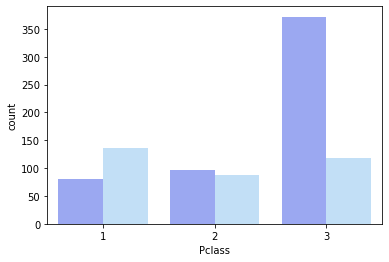

In [8]:
#data visualization
#survive rate compare with pclass (ticket class)
sns.countplot(x='Pclass', data=train_data, palette=["#8D9EFF","#B9E0FF"], hue="Survived")
plt.legend([],[], frameon=False)
#plt.savefig('ticket_class_survived.png', format='png', dpi=300) //save as png

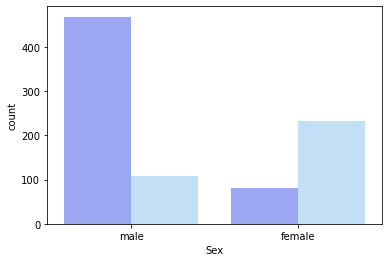

In [9]:
#survive rate compare with sex
sns.countplot(x='Sex', data=train_data, palette=["#8D9EFF","#B9E0FF"], hue="Survived")
plt.legend([],[], frameon=False)
#plt.savefig('sex_survived.png', format='png', dpi=300)

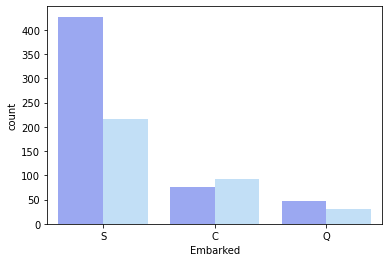

In [10]:
#survive rate compare with embarked
sns.countplot(x='Embarked', data=train_data, palette=["#8D9EFF","#B9E0FF"], hue="Survived")
plt.legend([],[], frameon=False)
#plt.savefig('embarked_survived.png', format='png', dpi=300)

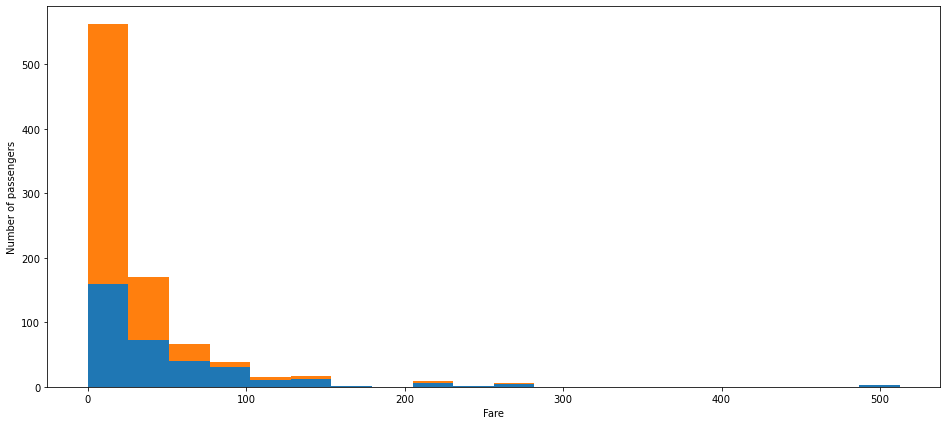

In [11]:
#new feature 'Died' just for visualize
train_data['Died'] = 1 - train_data['Survived']
#survive rate with fare
figure = plt.figure(figsize=(16, 7))
plt.hist([train_data[train_data['Survived'] == 1]['Fare'], train_data[train_data['Survived'] == 0]['Fare']], 
         stacked=True, bins = 20, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()
plt.legend([],[], frameon=False)
#plt.savefig('fare_survived.png', format='png', dpi=300)

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

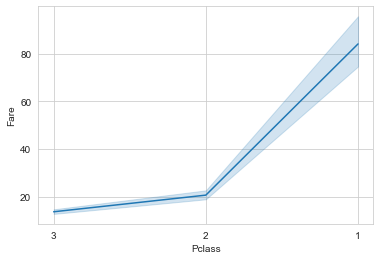

In [12]:
#relation between fare and ticket class
lcp = train_data.copy()
lcp["Pclass"] = lcp["Pclass"].astype(str)
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": "-"})
sns.lineplot(data=lcp.sort_values(by=["Pclass"], ascending=False), y="Fare", x="Pclass", palette="white")
#plt.savefig('pclass_fare.png', format='png', dpi=300)

In [13]:
#survive rate compare with title

In [14]:
#pearson correlation